In [3]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None 
df = pd.read_csv('./datos/HU2.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
0,0,India,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,No (we do not use ML methods),NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...","Google Cloud Platform (GCP) ,","Google Cloud Compute Engine ,","Google Cloud Storage (GCS) ,","No / None,","No / None,",NaN,"No / None,","GitHub , Kaggle ,","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...","Email newsletters (Data Elixir, O'Reilly Data ..."
1,1,Indonesia,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,"Kaggle Notebooks,Colab Notebooks,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle Learn Courses,Cloud-certification progr...","Journal Publications (peer-reviewed journals, ..."
2,2,Pakistan,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,I do not know,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,NaN,"Kaggle Notebooks,",NaN,NaN,"None,",NaN,NaN,"DataRobot,","No / None,",NaN,"No / None,","I do not share my work publicly,","DataCamp,","Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
3,3,Mexico,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,I do not know,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","None,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,edX,","YouTube (Kaggle YouTube, Cloud AI Adventures, ..."
4,4,India,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,We use ML methods for generating insights (but...,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,"Google Cloud Datalab,",NaN,NaN,"Microsoft Azure ,","Microsoft Azure Virtual Machines ,","Microsoft Azure Data Lake Storage ,","Azure Machine Learning Studio ,","No / None,",NaN,"Weights & Biases ,","I do not share my work publicly,","Kaggle Learn Courses,Udemy,","Journal Publications (peer-reviewed journals, ..."


In [ ]:
df['q6'].unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', 'I have never written code'], dtype=object)

In [ ]:
df_q10=df['q10'].reset_index()
df_q10

,index,q10
0,0,"Colab Notebooks,"
1,1,"Kaggle Notebooks,Colab Notebooks,"
2,2,"Kaggle Notebooks,"
3,3,"Colab Notebooks,"
4,4,"Google Cloud Datalab,"
...,...,...
25968,25968,"Colab Notebooks, Amazon Sagemaker Studio Noteb..."
25969,25969,"None,"
25970,25970,NaN
25971,25971,"None,"


In [4]:

def quitar_comillas (col):
        try:
            return col.split(',')
        except:
            np.nan

# q39

In [6]:
df_q39=df['q39'].reset_index()
df_q39

,index,q39
0,0,"GitHub , Kaggle ,"
1,1,NaN
2,2,"I do not share my work publicly,"
3,3,NaN
4,4,"I do not share my work publicly,"
...,...,...
25968,25968,"GitHub , Colab ,"
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [7]:
df_q39['q39'] = df_q39['q39'].apply(quitar_comillas)

In [8]:
df_39_explode = df_q39['q39'].explode().reset_index()

In [9]:
df_39_explode

,index,q39
0,0,GitHub
1,0,Kaggle
2,0,
3,1,None
4,2,I do not share my work publicly
...,...,...
40460,25968,
40461,25969,None
40462,25970,None
40463,25971,None


In [10]:
df_39_explode['q39'].unique()

array([' GitHub ', ' Kaggle ', '', None,
       'I do not share my work publicly', ' Plotly Dash ', ' Colab ',
       'Other', ' Streamlit ', ' Personal blog ', ' NBViewer ', ' Shiny '],
      dtype=object)

In [11]:
gb39 = df_39_explode.groupby('q39').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [12]:
df_q39 = gb39.reset_index(name='count')

In [13]:
df_q39

,q39,count
0,,8905
1,Colab,1848
2,GitHub,4586
3,Kaggle,3065
4,NBViewer,136
5,Personal blog,705
6,Plotly Dash,293
7,Shiny,305
8,Streamlit,387
9,I do not share my work publicly,3167


In [14]:
df_q39.drop(0, axis= 0,inplace=True)

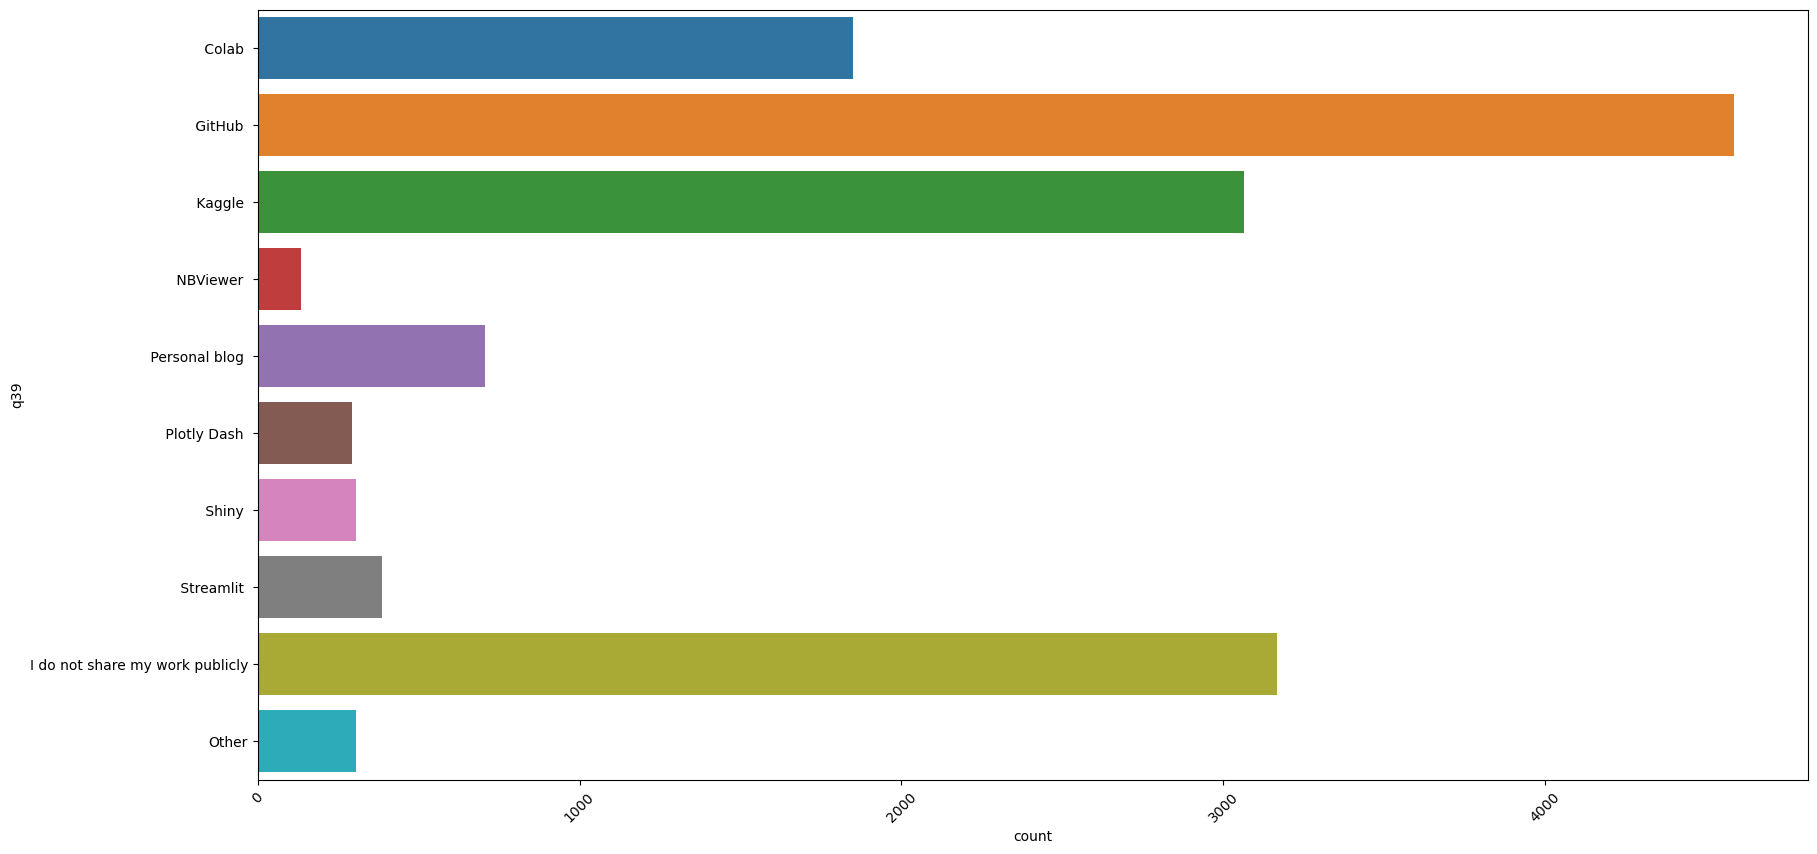

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q39', data=df_q39)
plt.xticks(rotation = 45);

# q40

In [19]:
df_q40=df['q40'].reset_index()
df_q40

,index,q40
0,0,"Coursera,edX,Kaggle Learn Courses,DataCamp,Uda..."
1,1,"Kaggle Learn Courses,Cloud-certification progr..."
2,2,"DataCamp,"
3,3,"Coursera,edX,"
4,4,"Kaggle Learn Courses,Udemy,"
...,...,...
25968,25968,"Coursera,Kaggle Learn Courses,DataCamp,Udacity..."
25969,25969,NaN
25970,25970,"Coursera,LinkedIn Learning,"
25971,25971,NaN


In [20]:
df_q40['q40'] = df_q40['q40'].apply(quitar_comillas)

In [21]:
df_40_explode = df_q40['q40'].explode().reset_index()

In [22]:
df_40_explode

,index,q40
0,0,Coursera
1,0,edX
2,0,Kaggle Learn Courses
3,0,DataCamp
4,0,Udacity
...,...,...
78264,25970,LinkedIn Learning
78265,25970,
78266,25971,None
78267,25972,None


In [23]:
df_40_explode['q40'].unique()

array(['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Udacity',
       'Udemy', '', 'Cloud-certification programs (direct from AWS',
       ' Azure', ' GCP', ' or similar)',
       'University Courses (resulting in a university degree)', None,
       'LinkedIn Learning', 'None', 'Other', 'Fast.ai'], dtype=object)

In [24]:
gb40 = df_40_explode.groupby('q40').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [25]:
df_q40 = gb40.reset_index(name='count')

In [26]:
df_q40

,q40,count
0,,17128
1,Azure,1804
2,GCP,1804
3,or similar),1804
4,Cloud-certification programs (direct from AWS,1804
5,Coursera,9649
6,DataCamp,3996
7,Fast.ai,1157
8,Kaggle Learn Courses,8670
9,LinkedIn Learning,2693


In [27]:
df_q40.drop(0, axis= 0,inplace=True)

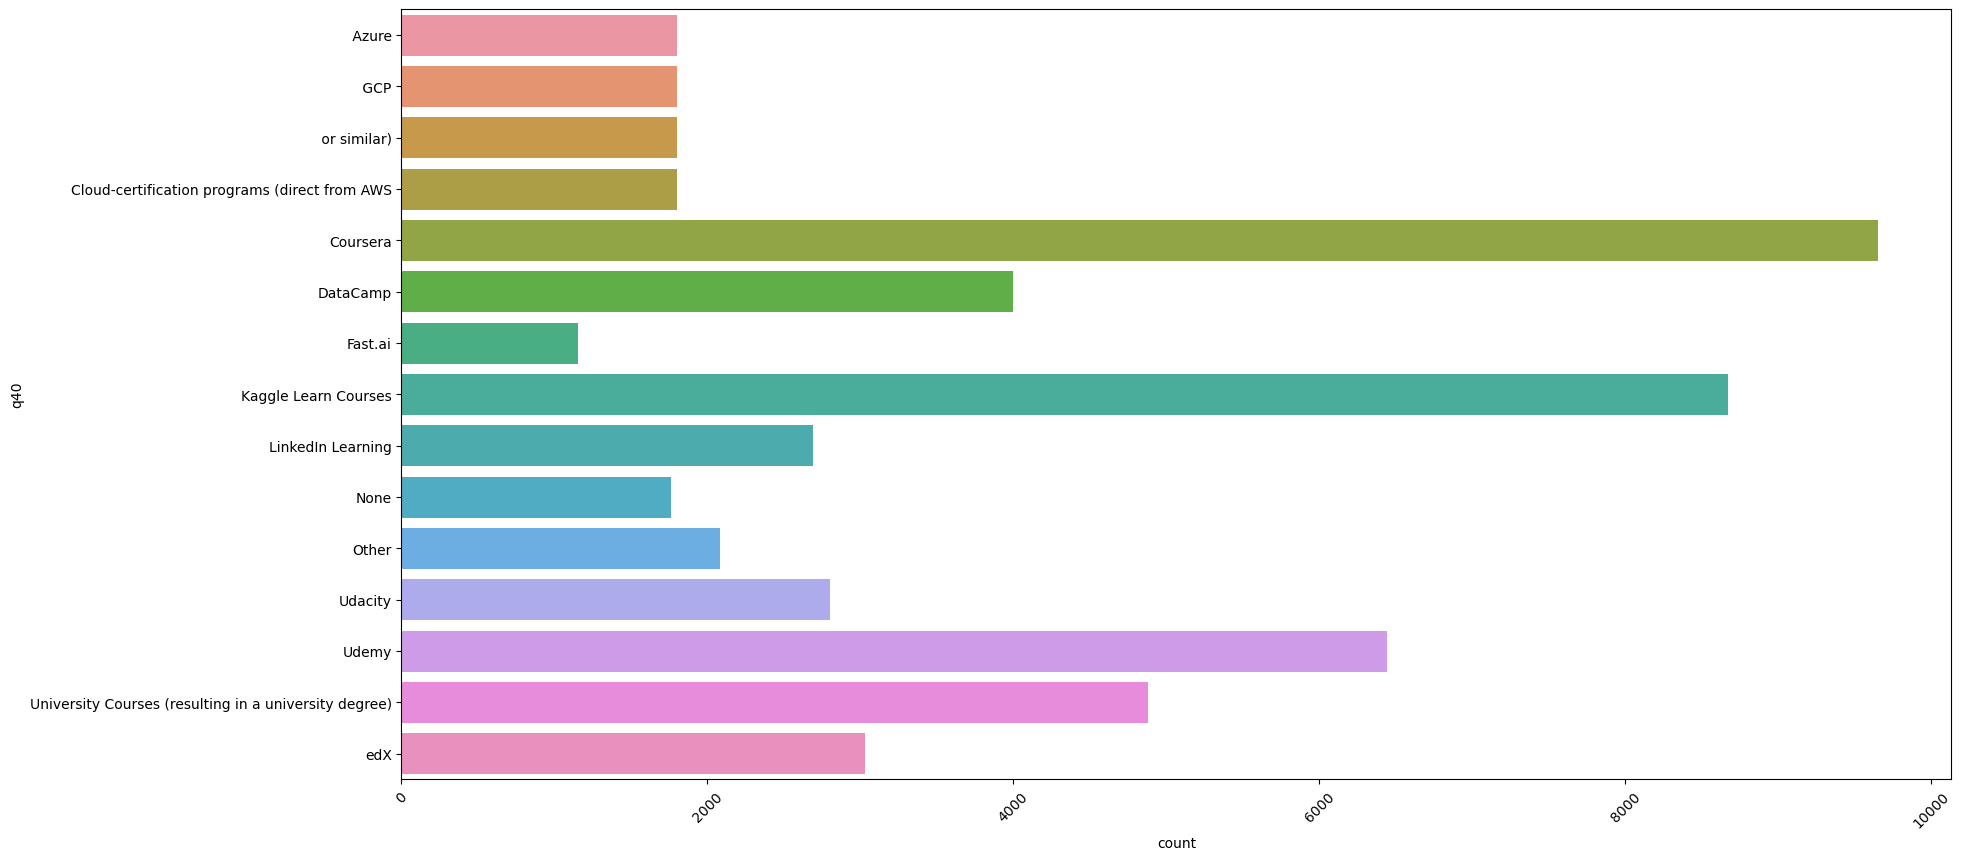

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q40', data=df_q40)
plt.xticks(rotation = 45);

# q42

In [30]:
df_q42=df['q42'].reset_index()
df_q42

,index,q42
0,0,"Email newsletters (Data Elixir, O'Reilly Data ..."
1,1,"Journal Publications (peer-reviewed journals, ..."
2,2,"Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
3,3,"YouTube (Kaggle YouTube, Cloud AI Adventures, ..."
4,4,"Journal Publications (peer-reviewed journals, ..."
...,...,...
25968,25968,"Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
25969,25969,NaN
25970,25970,"None,"
25971,25971,NaN


In [31]:
df_q42['q42'] = df_q42['q42'].apply(quitar_comillas)

In [32]:
df_42_explode = df_q42['q42'].explode().reset_index()

In [33]:
df_42_explode

,index,q42
0,0,Email newsletters (Data Elixir
1,0,O'Reilly Data & AI
2,0,etc)
3,0,Kaggle (notebooks
4,0,forums
...,...,...
167265,25970,None
167266,25970,
167267,25971,None
167268,25972,None


In [34]:
df_42_explode['q42'].unique()

array(['Email newsletters (Data Elixir', " O'Reilly Data & AI", ' etc)',
       'Kaggle (notebooks', ' forums', 'YouTube (Kaggle YouTube',
       ' Cloud AI Adventures', 'Podcasts (Chai Time Data Science',
       ' O’Reilly Data Show', 'Blogs (Towards Data Science',
       ' Analytics Vidhya',
       'Journal Publications (peer-reviewed journals',
       ' conference proceedings', '', 'Course Forums (forums.fast.ai',
       ' Coursera forums', None, 'Slack Communities (ods.ai',
       ' kagglenoobs', 'Twitter (data science influencers)',
       'Reddit (r/machinelearning', 'Other', 'None'], dtype=object)

In [35]:
gb42 = df_42_explode.groupby('q42').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [36]:
df_q42 = gb42.reset_index(name='count')

In [37]:
df_q42

,q42,count
0,,17746
1,Analytics Vidhya,7977
2,Cloud AI Adventures,10401
3,Coursera forums,2996
4,O'Reilly Data & AI,3441
5,O’Reilly Data Show,2022
6,conference proceedings,3350
7,etc),46494
8,forums,11373
9,kagglenoobs,1995


In [38]:
df_q42.drop(0, axis= 0,inplace=True)

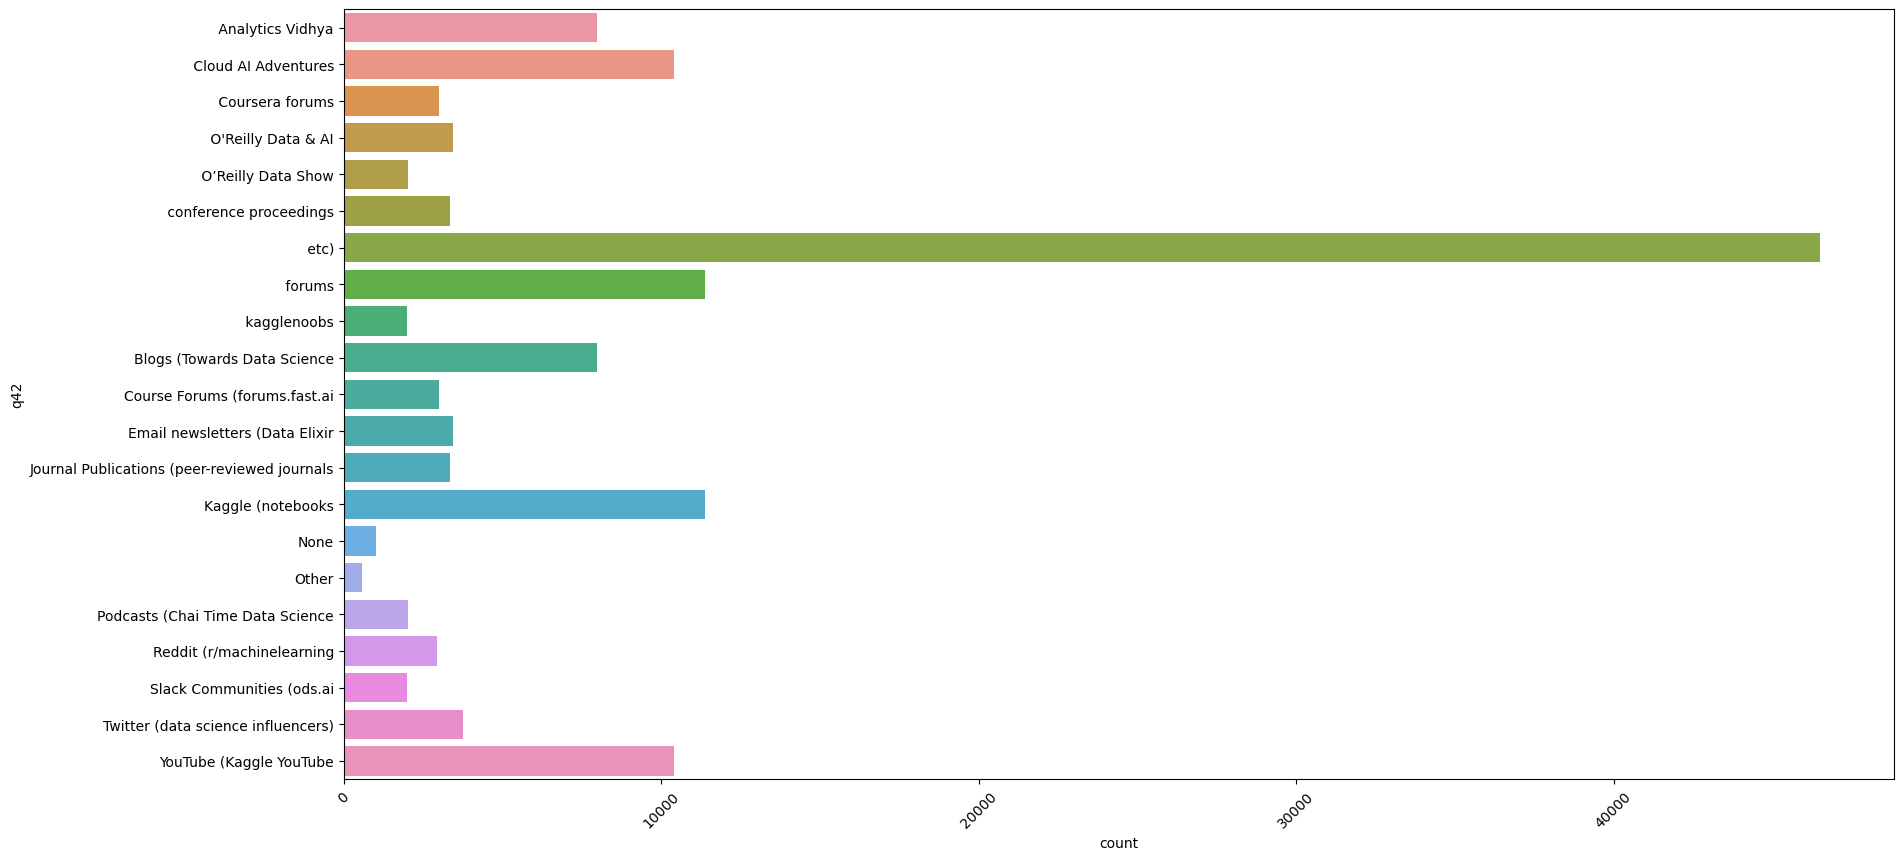

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q42', data=df_q42)
plt.xticks(rotation = 45);